# <center><div style="font-family: Trebuchet MS; background-color: #AED6F2; color: #3498DB; padding: 12px; line-height: 1;">Telco Customer Churn Data Analysis</div></center>
## <div style="color: #3415DB"><center> Customer Segmentation</center>
#### <center> Kwok Sze Ming [22022177D]</center>
- https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data


<center>
    <img src="https://www.cleartouch.in/wp-content/uploads/2023/02/Customer-Segmentation.png" alt="Telco" width="50%">
</center>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_22416\3058419429.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")


In [3]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
data.dropna(subset=['Churn'], inplace=True)
columns_with_missing_values = data.columns[data.isna().any()].tolist()

print(columns_with_missing_values)

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']


In [5]:
dff=data.copy()
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
columns_with_missing_values = data.columns[data.isna().any()].tolist()

print(columns_with_missing_values)

[]


In [7]:
df=data.copy() 

In [8]:
train_df = data.copy()

### All missing values are removed.Here we can split the data into test and train dataset;

train_df: 51047
test_df:20000

In [9]:
print('Train data:')
print('There are' , train_df.shape[0] , 'rows')
print('There are' , train_df.shape[1] , 'columns')
print('There is' , train_df.duplicated().sum() ,'duplicated')
print('=====================================================')
print('Number of Churn:')
print(train_df['Churn'].value_counts())

Train data:
There are 51047 rows
There are 58 columns
There is 0 duplicated
Number of Churn:
No     36336
Yes    14711
Name: Churn, dtype: int64


# Yes:1, No:0

In [10]:
# Define a dictionary to map values
mapping = {'Yes': 1, 'No': 0, 'Known':1, 'Unknown': 0}

# Apply mapping to all columns
train_df = train_df.replace(mapping)

# outliers

In [11]:
from scipy import stats

columns_with_outliers = []

for column in train_df.columns:
    if train_df[column].dtype in [np.int64, np.float64]:
        # Calculate Z-scores for the numeric column
        z_scores = np.abs(stats.zscore(train_df[column]))

        # Set a threshold for the Z-score above which a data point is considered an outlier
        z_threshold = 3

        # Find the indices of outliers based on the Z-scores
        z_outlier_indices = np.where(z_scores > z_threshold)

        # Calculate Q1, Q3, and IQR for the column
        Q1 = train_df[column].quantile(0.25)
        Q3 = train_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find the indices of outliers based on the IQR
        iqr_outlier_indices = np.where((train_df[column] < (Q1 - 1.5 * IQR)) | (train_df[column] > (Q3 + 1.5 * IQR)))

        # Check if either Z-score or IQR method detected outliers
        if len(z_outlier_indices[0]) > 0 or len(iqr_outlier_indices[0]) > 0:
            columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'MadeCallToRetentionTeam']


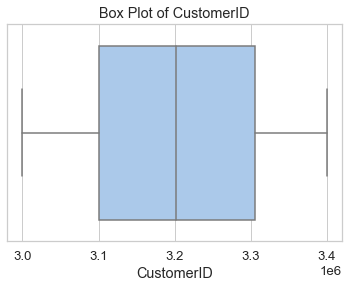

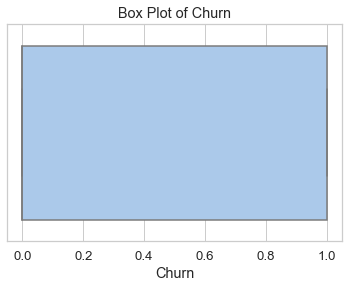

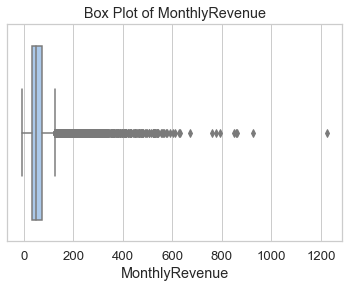

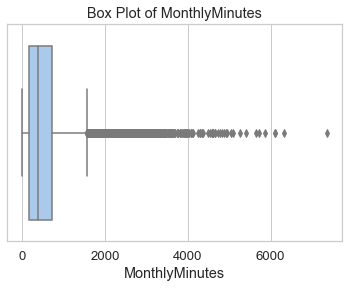

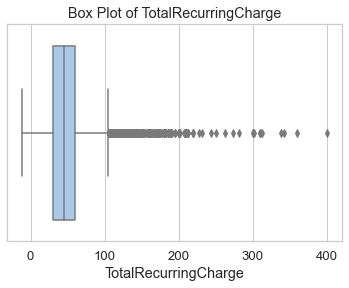

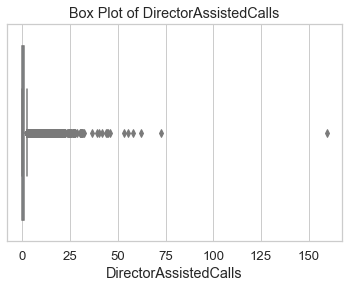

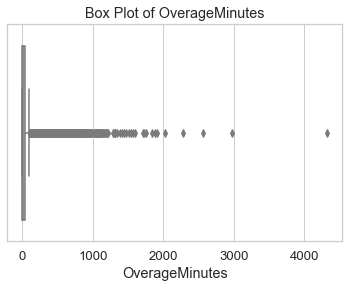

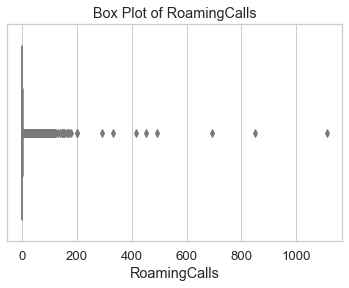

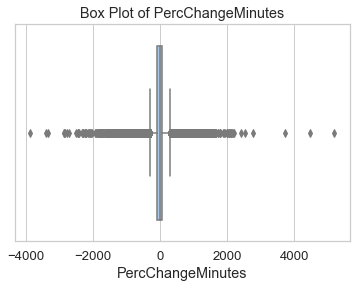

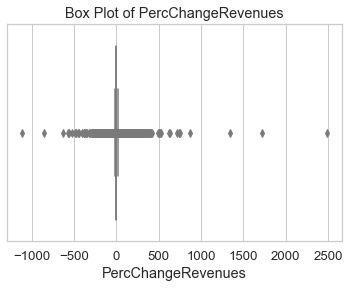

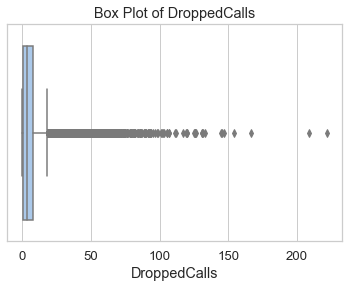

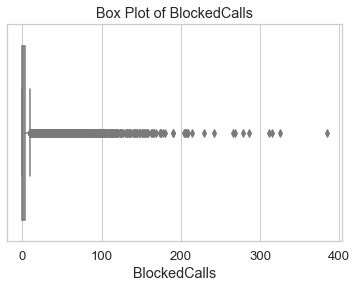

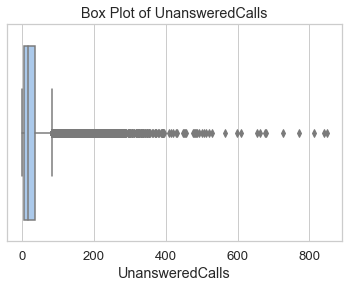

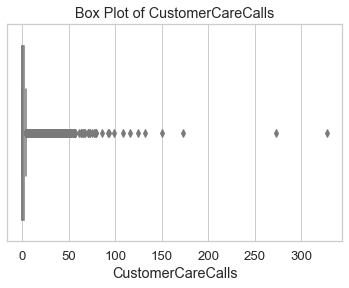

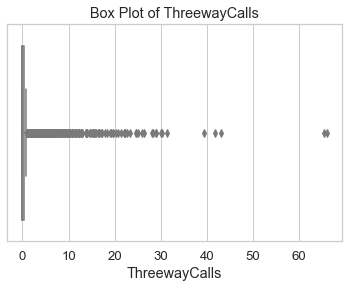

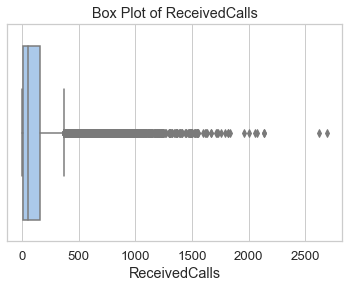

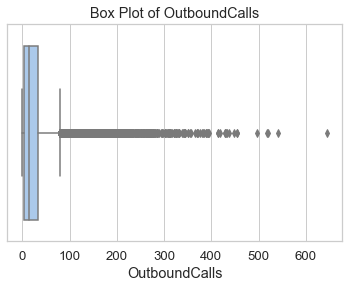

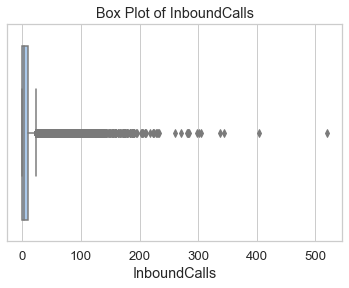

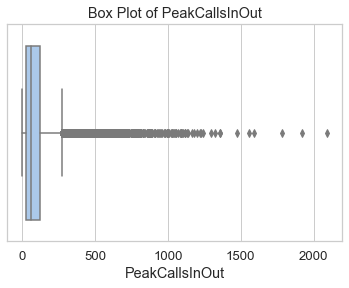

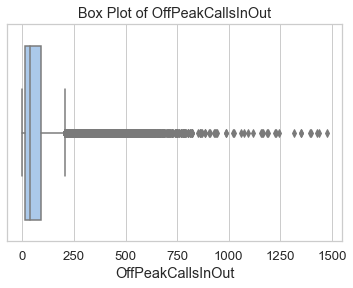

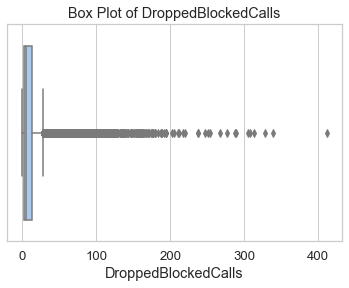

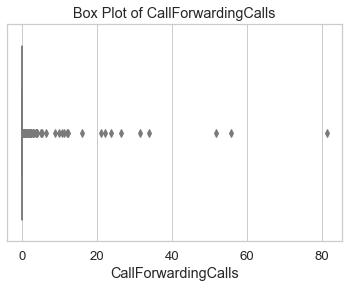

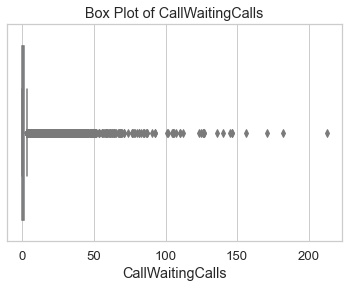

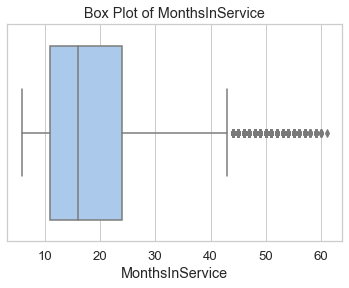

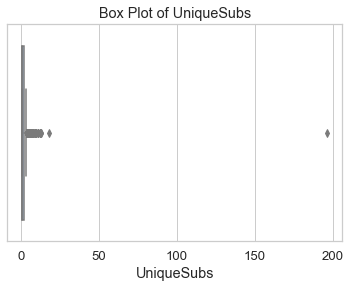

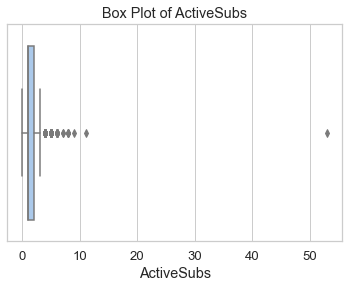

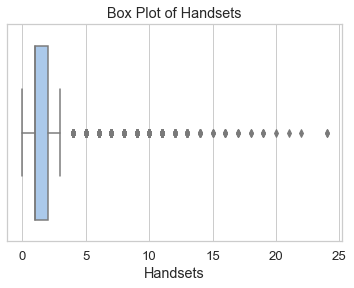

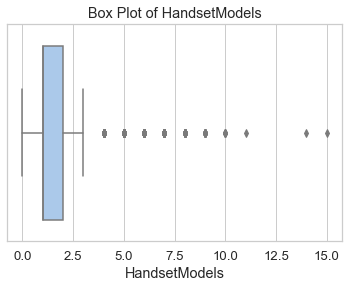

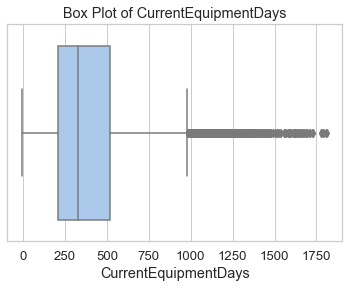

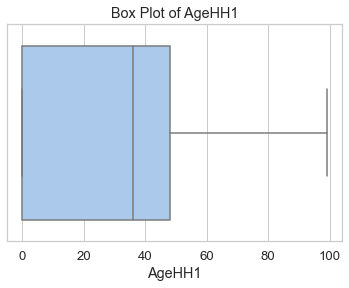

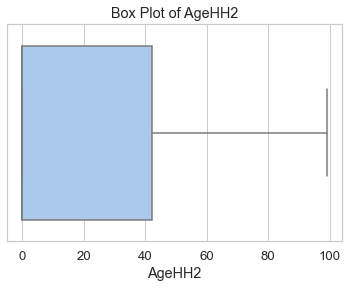

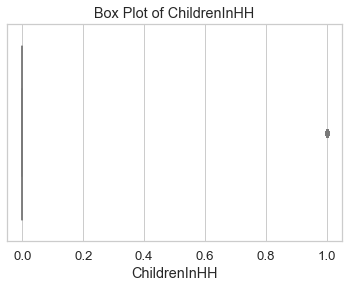

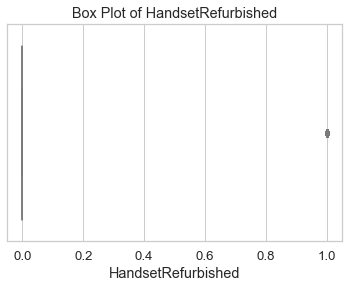

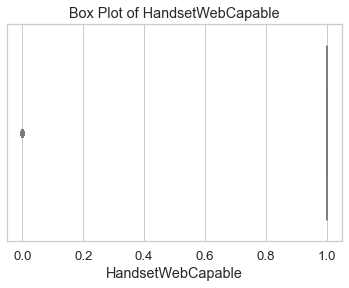

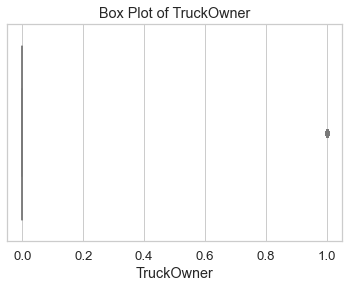

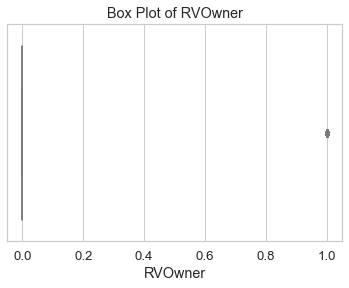

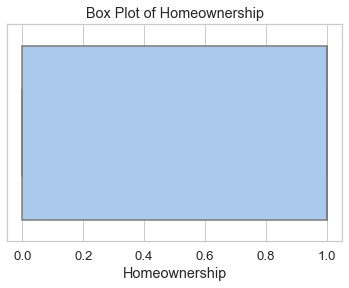

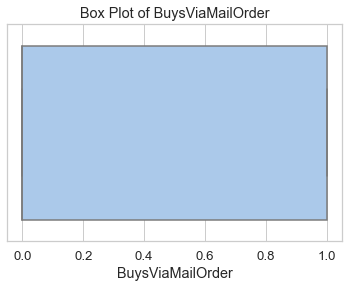

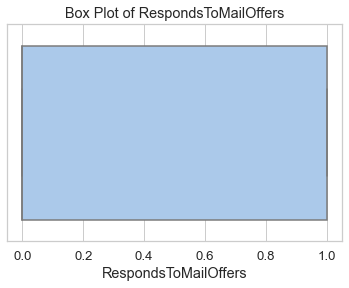

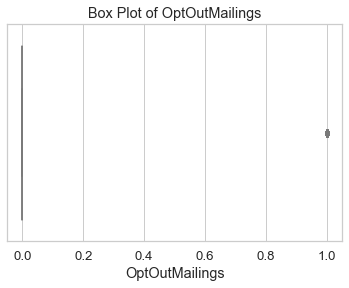

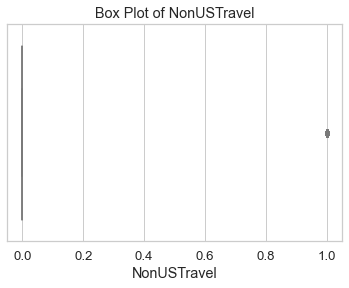

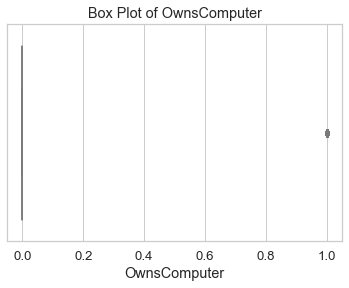

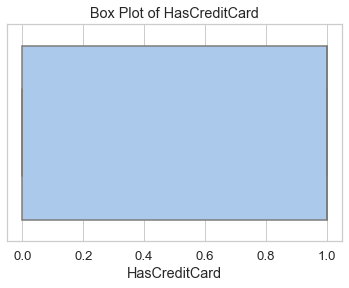

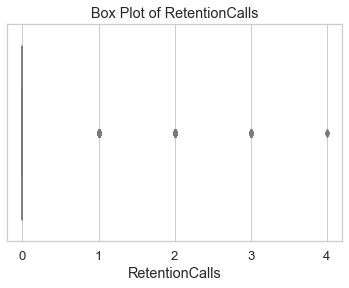

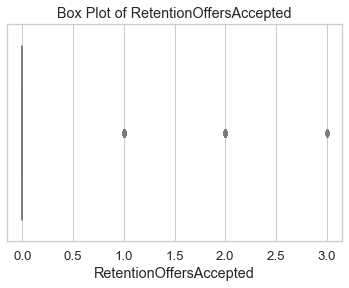

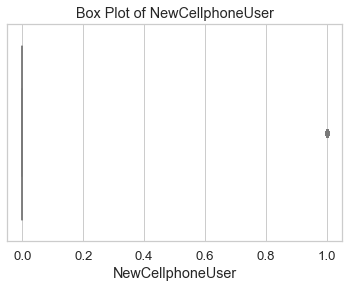

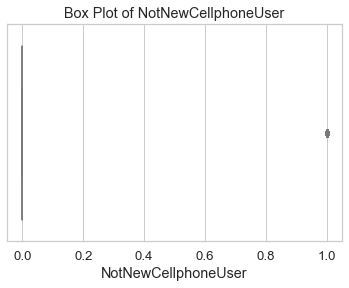

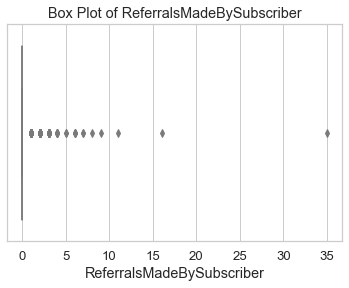

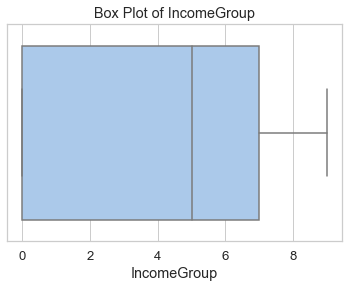

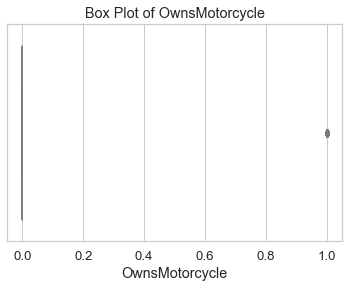

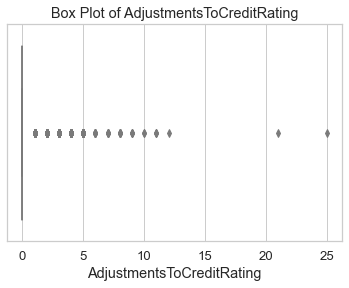

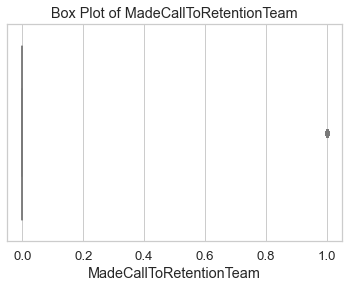

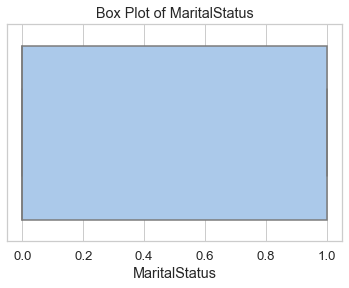

In [12]:
numeric_columns = train_df.select_dtypes(include=np.number).columns

summary_stats = train_df[numeric_columns].describe()

# Detect outliers using the interquartile range (IQR) method
q1 = summary_stats.loc['25%']
q3 = summary_stats.loc['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (train_df[numeric_columns] < lower_bound) | (train_df[numeric_columns] > upper_bound)

# Identify columns with outliers
columns_with_outliers = outliers.any()

sns.set_palette("pastel")

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=train_df[column], palette="pastel")
    ax.set_facecolor('white')  
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

# Heatmap

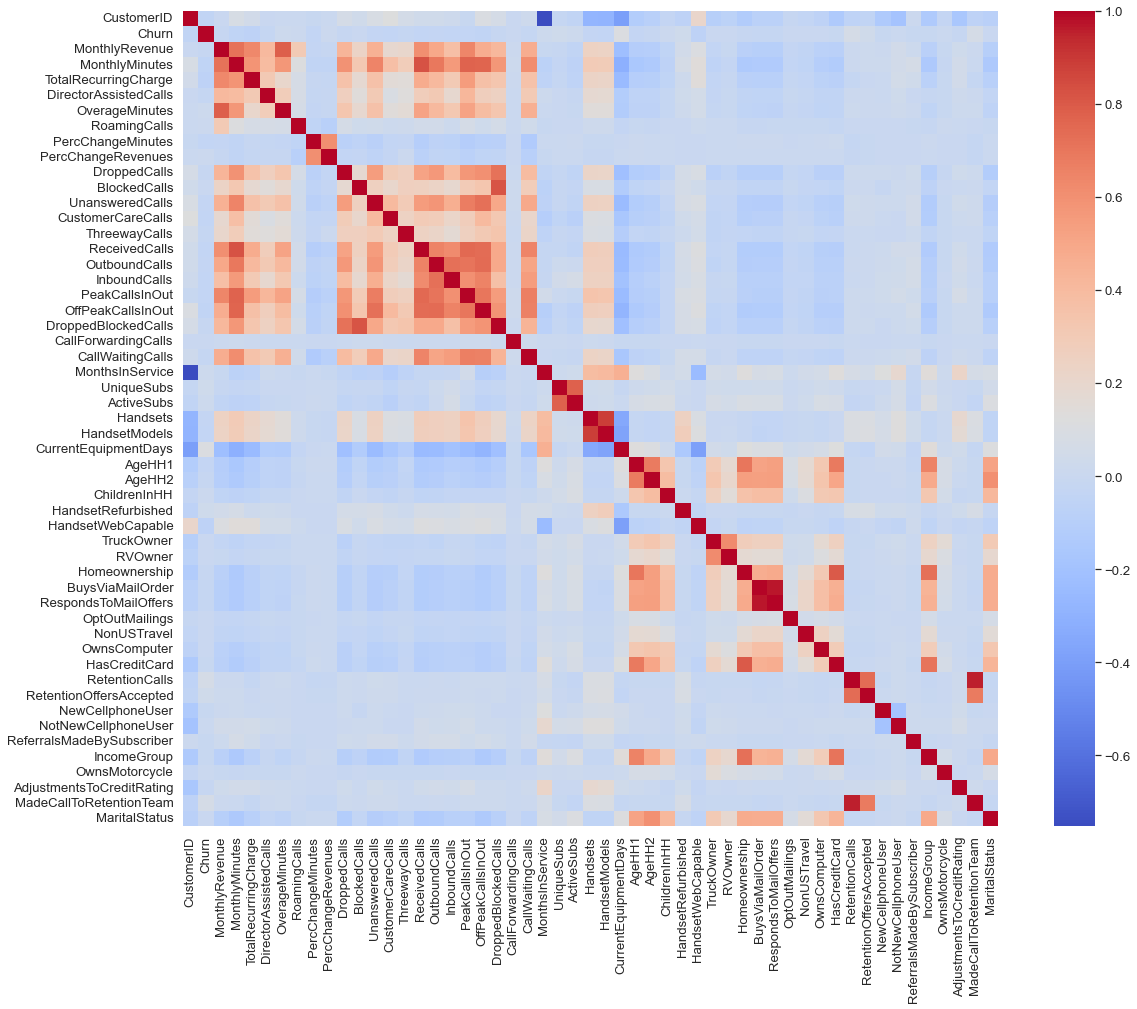

In [13]:
cor = train_df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(cor,square=True, cmap='coolwarm')

plt.show()

In [14]:
correlation = train_df.corr()['Churn']

correlation_sorted = correlation.sort_values(ascending=False)

negative_correlation_vars = correlation[correlation < 0].index

print(correlation_sorted)

Churn                        1.000000
CurrentEquipmentDays         0.103704
MadeCallToRetentionTeam      0.067393
RetentionCalls               0.065301
RetentionOffersAccepted      0.034953
UniqueSubs                   0.034522
HandsetRefurbished           0.029949
MonthsInService              0.018703
OverageMinutes               0.015973
ActiveSubs                   0.015515
PercChangeRevenues           0.011188
RoamingCalls                 0.010723
ChildrenInHH                 0.009562
OwnsMotorcycle               0.007295
NotNewCellphoneUser          0.006728
OptOutMailings               0.000102
CallForwardingCalls         -0.001449
OwnsComputer                -0.002046
NonUSTravel                 -0.002941
RVOwner                     -0.003454
MaritalStatus               -0.004666
TruckOwner                  -0.004818
BlockedCalls                -0.005530
NewCellphoneUser            -0.007695
HasCreditCard               -0.008618
ReferralsMadeBySubscriber   -0.010686
IncomeGroup 

# Remove outliers

In [15]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# List of columns to consider for outlier removal
columns_to_check = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 
                    'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues']

# Remove outliers using the IQR method
train_df_cleaned = remove_outliers_iqr(train_df, columns_to_check)

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Original DataFrame shape:", train_df.shape)
print("Cleaned DataFrame shape:", train_df_cleaned.shape)


Original DataFrame shape: (51047, 58)
Cleaned DataFrame shape: (26805, 58)


In [16]:
# Convert specified columns into one-hot encoded format
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['ServiceArea','CreditRating', 'PrizmCode', 'HandsetPrice', 'Occupation'], drop_first=True)

# Modeling

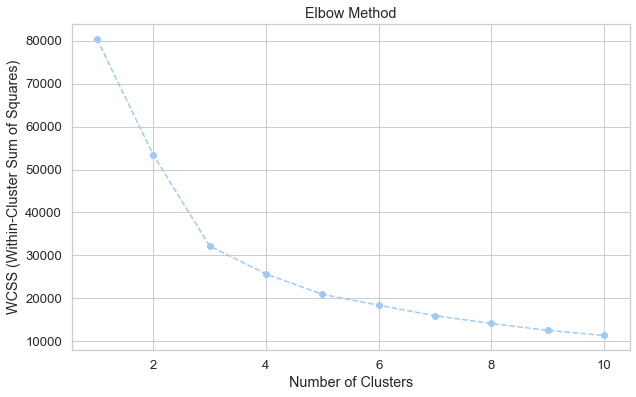

In [17]:
# Select the relevant features for segmentation
X = train_df_cleaned[['MonthlyRevenue', 'MonthlyMinutes','Churn']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


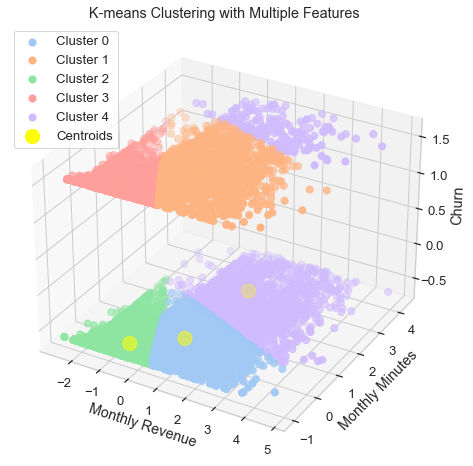

In [18]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

train_df_cleaned['Cluster'] = kmeans.labels_
from mpl_toolkits.mplot3d import Axes3D

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    ax.scatter(X_scaled[kmeans.labels_ == i, 0], X_scaled[kmeans.labels_ == i, 1], X_scaled[kmeans.labels_ == i, 2], s=50, label=f'Cluster {i}')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='yellow', label='Centroids')
ax.set_title('K-means Clustering with Multiple Features')
ax.set_xlabel('Monthly Revenue')
ax.set_ylabel('Monthly Minutes')
ax.set_zlabel('Churn')
ax.legend()
plt.show()

In [19]:
# Get cluster centroids
cluster_centers = kmeans.cluster_centers_

cluster_counts = [(i, np.sum(kmeans.labels_ == i)) for i in range(5)]

print("Cluster Centroids:")
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i} centroid: {centroid}")

print("\nCluster Counts:")
for cluster, count in cluster_counts:
    print(f"Cluster {cluster}: {count} data points")


Cluster Centroids:
Cluster 0 centroid: [ 0.63463972  0.23053969 -0.6313821 ]
Cluster 1 centroid: [0.84990578 0.50186147 1.58382696]
Cluster 2 centroid: [-0.66074126 -0.55372754 -0.6313821 ]
Cluster 3 centroid: [-0.64286338 -0.6051485   1.58382696]
Cluster 4 centroid: [ 1.27824311  2.25333129 -0.46662929]

Cluster Counts:
Cluster 0: 6781 data points
Cluster 1: 2671 data points
Cluster 2: 10091 data points
Cluster 3: 4787 data points
Cluster 4: 2475 data points


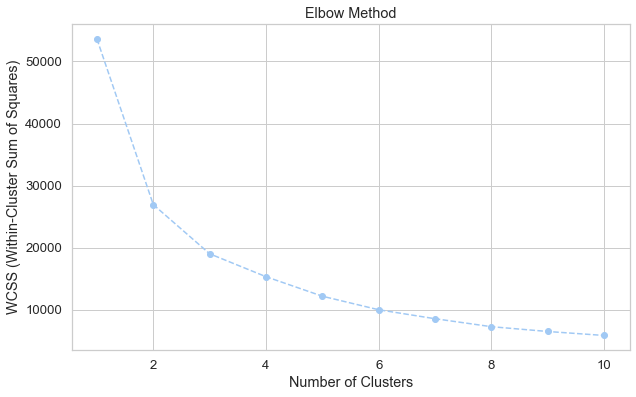

In [20]:
X = train_df_cleaned[['MonthlyRevenue', 'MonthlyMinutes']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


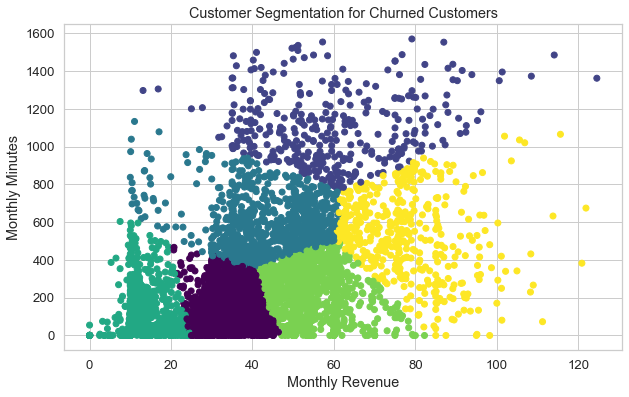

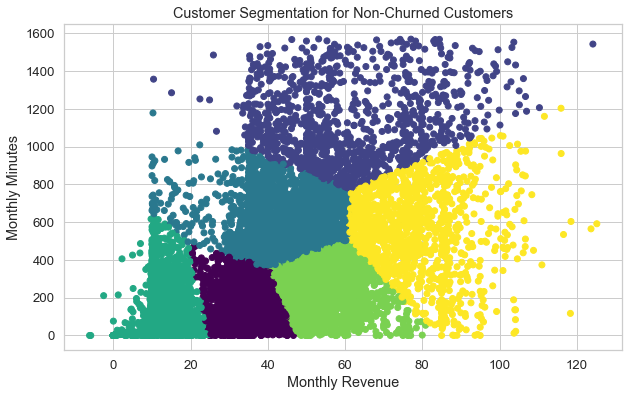

In [21]:
# Based on the elbow curve, choose the optimal number of clusters
# choose K=6 (the point where the curve starts to flatten out)

# Apply K-means clustering with K=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

train_df_cleaned['Cluster'] = kmeans.labels_

churned_df = train_df_cleaned[train_df_cleaned['Churn'] == 1]
non_churned_df = train_df_cleaned[train_df_cleaned['Churn'] == 0]

# Visualize the clusters for churned customers
plt.figure(figsize=(10, 6))
plt.scatter(churned_df['MonthlyRevenue'], churned_df['MonthlyMinutes'], c=churned_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation for Churned Customers')
plt.xlabel('Monthly Revenue')
plt.ylabel('Monthly Minutes')
plt.show()

# Visualize the clusters for non-churned customers
plt.figure(figsize=(10, 6))
plt.scatter(non_churned_df['MonthlyRevenue'], non_churned_df['MonthlyMinutes'], c=non_churned_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation for Non-Churned Customers')
plt.xlabel('Monthly Revenue')
plt.ylabel('Monthly Minutes')
plt.show()

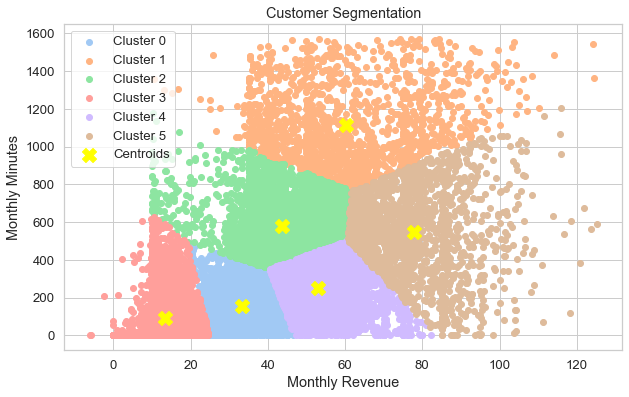

In [29]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

train_df_cleaned['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster in range(6):
    cluster_data = train_df_cleaned[train_df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['MonthlyRevenue'], cluster_data['MonthlyMinutes'], label=f'Cluster {cluster}')

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='yellow', s=200, marker='X', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Monthly Revenue')
plt.ylabel('Monthly Minutes')
plt.legend()
plt.show()

# Profile Segments:

In [23]:
cluster_stats = train_df_cleaned.groupby('Cluster')[['MonthlyRevenue', 'MonthlyMinutes']].describe()
print(cluster_stats)

        MonthlyRevenue                                                         \
                 count       mean        std    min      25%     50%      75%   
Cluster                                                                         
0              11175.0  33.246004   3.972949  20.00  30.2400  32.580  35.4800   
1               1504.0  60.149395  16.426340  10.40  49.8125  57.785  72.4000   
2               4102.0  43.765002   9.261653  10.00  37.0400  43.250  50.8475   
3               3746.0  13.400206   5.668351  -6.17  10.0000  12.650  17.6400   
4               4584.0  52.931649   6.704417  40.47  49.0400  51.080  56.9800   
5               1694.0  77.761263  11.116274  60.75  69.0875  76.270  85.0475   

                MonthlyMinutes                                                 \
            max          count         mean         std    min    25%     50%   
Cluster                                                                         
0         46.62        1117

# Examine Cluster Centers:

In [31]:
# Transform centroids back to the original feature space
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster Centroids:")
for i, centroid in enumerate(centroids_original, start=0):
    print(f"Cluster {i} centroid: {centroid}")

print("\nCluster Counts:")
cluster_counts = train_df_cleaned['Cluster'].value_counts().sort_index()
for i, count in enumerate(cluster_counts, start=0):
    print(f"Cluster {i}: {count} data points")

Cluster Centroids:
Cluster 0 centroid: [ 33.25584607 153.95289175]
Cluster 1 centroid: [  60.12831446 1112.98934044]
Cluster 2 centroid: [ 43.76316996 579.10753475]
Cluster 3 centroid: [13.40020555 95.06727176]
Cluster 4 centroid: [ 52.97236836 249.0187896 ]
Cluster 5 centroid: [ 77.77085056 549.76373302]

Cluster Counts:
Cluster 0: 11175 data points
Cluster 1: 1504 data points
Cluster 2: 4102 data points
Cluster 3: 3746 data points
Cluster 4: 4584 data points
Cluster 5: 1694 data points


# Visualize Cluster Profiles:

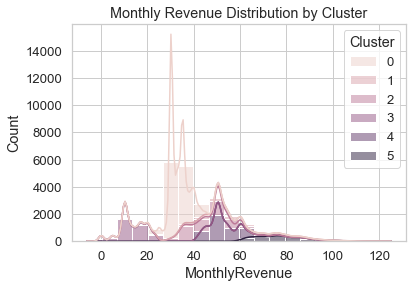

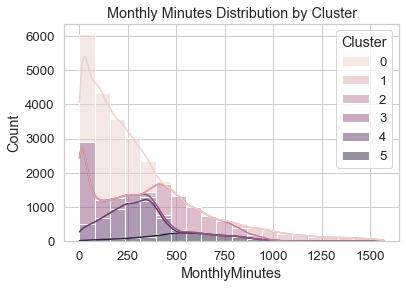

In [25]:
sns.histplot(data=train_df_cleaned, x='MonthlyRevenue', hue='Cluster', kde=True, multiple="stack", bins=20)
plt.title('Monthly Revenue Distribution by Cluster')
plt.show()

sns.histplot(data=train_df_cleaned, x='MonthlyMinutes', hue='Cluster', kde=True, multiple="stack", bins=20)
plt.title('Monthly Minutes Distribution by Cluster')
plt.show()

# Compare Cluster Characteristics:

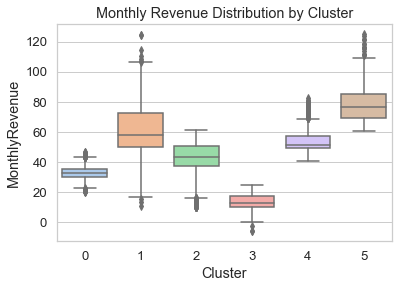

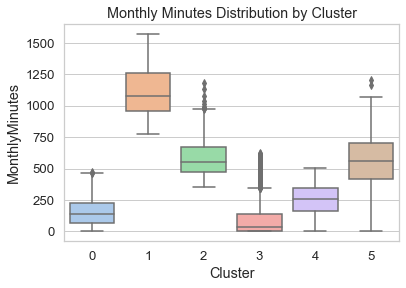

In [26]:
sns.boxplot(data=train_df_cleaned, x='Cluster', y='MonthlyRevenue')
plt.title('Monthly Revenue Distribution by Cluster')
plt.show()

sns.boxplot(data=train_df_cleaned, x='Cluster', y='MonthlyMinutes')
plt.title('Monthly Minutes Distribution by Cluster')
plt.show()

In [27]:
revenue_stats = train_df_cleaned.groupby('Cluster')['MonthlyRevenue'].describe()
minutes_stats = train_df_cleaned.groupby('Cluster')['MonthlyMinutes'].describe()

print("Monthly Revenue Statistics by Cluster:")
print(revenue_stats)
print()

print("Monthly Minutes Statistics by Cluster:")
print(minutes_stats)

Monthly Revenue Statistics by Cluster:
           count       mean        std    min      25%     50%      75%  \
Cluster                                                                   
0        11175.0  33.246004   3.972949  20.00  30.2400  32.580  35.4800   
1         1504.0  60.149395  16.426340  10.40  49.8125  57.785  72.4000   
2         4102.0  43.765002   9.261653  10.00  37.0400  43.250  50.8475   
3         3746.0  13.400206   5.668351  -6.17  10.0000  12.650  17.6400   
4         4584.0  52.931649   6.704417  40.47  49.0400  51.080  56.9800   
5         1694.0  77.761263  11.116274  60.75  69.0875  76.270  85.0475   

            max  
Cluster          
0         46.62  
1        124.54  
2         61.04  
3         24.59  
4         82.23  
5        125.19  

Monthly Minutes Statistics by Cluster:
           count         mean         std    min    25%     50%      75%  \
Cluster                                                                    
0        11175.0   153.8

In [28]:
revenue_stats = revenue_stats[['50%', '25%', '75%']]
minutes_stats = minutes_stats[['50%', '25%', '75%']]

print("Monthly Revenue Statistics by Cluster:")
print(revenue_stats)
print()

print("Monthly Minutes Statistics by Cluster:")
print(minutes_stats)

Monthly Revenue Statistics by Cluster:
            50%      25%      75%
Cluster                          
0        32.580  30.2400  35.4800
1        57.785  49.8125  72.4000
2        43.250  37.0400  50.8475
3        12.650  10.0000  17.6400
4        51.080  49.0400  56.9800
5        76.270  69.0875  85.0475

Monthly Minutes Statistics by Cluster:
            50%    25%      75%
Cluster                        
0         139.0   70.0   228.00
1        1073.0  954.0  1258.00
2         550.0  470.0   670.75
3          36.0    6.0   141.75
4         258.0  161.0   344.00
5         559.0  414.0   704.00
